In [1]:
import geopandas

In [2]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

In [3]:
world

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,7111024,Europe,Serbia,SRB,101800.0,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,642550,Europe,Montenegro,MNE,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1895250,Europe,Kosovo,-99,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


## Modeling liga barcelona

In [1]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('/mnt/c/Users/PC/Desktop/KSCHOOL_MASTER_DS/Downloadss/season-1819.csv', header = 0)

In [4]:
df.tail(5)

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
205,2019-01-27,Espanol,Real Madrid,2,4,A,1,3,A,13,...,6,9,15,17,1,6,3,4,0,1
206,2019-01-27,Girona,Barcelona,0,2,A,0,1,A,13,...,5,7,18,12,3,8,5,3,1,0
207,2019-01-27,Sociedad,Huesca,0,0,D,0,0,D,8,...,1,1,9,22,5,2,0,3,0,0
208,2019-01-27,Valladolid,Celta,2,1,H,0,1,A,19,...,7,3,15,19,7,5,2,5,0,1
209,2019-01-28,Alaves,Vallecano,0,1,A,0,0,D,16,...,1,3,14,19,7,4,2,5,0,0


In [14]:
#hypothesis: try to simulate the remaining match results (Win/Draw/Lose) based on the ratios of Win/Draw/Lose obtained so far. 

In [5]:
df['count1'] = np.ones(df.shape[0])
a = df[['HomeTeam', 'count1']]
a = a.groupby('HomeTeam').count()

In [6]:
df['count2'] = np.ones(df.shape[0])
b = df[['AwayTeam', 'count2']]
b = b.groupby('AwayTeam').count()

In [7]:
a.reset_index()

,HomeTeam,count1
0,Alaves,10
1,Ath Bilbao,11
2,Ath Madrid,11
3,Barcelona,11
4,Betis,11
5,Celta,11
6,Eibar,11
7,Espanol,10
8,Getafe,10
9,Girona,11


In [8]:
c = a.join(b, on='HomeTeam')


In [9]:
c['count'] = c['count1'] + c['count2']   #Hemos comprobado que hayan jugado el mismo numero de partidos
c

,count1,count2,count
HomeTeam,,,
Alaves,10,11,21
Ath Bilbao,11,10,21
Ath Madrid,11,10,21
Barcelona,11,10,21
Betis,11,10,21
Celta,11,10,21
Eibar,11,10,21
Espanol,10,11,21
Getafe,10,11,21


In [10]:
df.head(5)

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,...,HF,AF,HC,AC,HY,AY,HR,AR,count1,count2
0,2018-08-17,Betis,Levante,0,3,A,0,1,A,22,...,10,10,5,3,0,2,0,0,1.0,1.0
1,2018-08-17,Girona,Valladolid,0,0,D,0,0,D,13,...,21,20,3,2,1,1,0,0,1.0,1.0
2,2018-08-18,Barcelona,Alaves,3,0,H,0,0,D,25,...,6,13,7,1,0,2,0,0,1.0,1.0
3,2018-08-18,Celta,Espanol,1,1,D,0,1,A,12,...,13,14,8,7,3,2,0,0,1.0,1.0
4,2018-08-18,Villarreal,Sociedad,1,2,A,1,1,D,16,...,16,10,4,6,2,3,0,0,1.0,1.0


In [17]:
table1 = df[['HomeTeam', 'FTR', 'count1']].replace({"H": "W", "A": "L"}).groupby(['HomeTeam', 'FTR']).count()
table2 = df[['AwayTeam', 'FTR', 'count1']].replace({"H": "L", "A": "W"}).groupby(['AwayTeam', 'FTR']).count()
table = pd.DataFrame()
table = table.append(table1)
table = table.append(table2)
table = table.groupby(['HomeTeam','FTR']).sum()
table.reset_index(inplace=True)
table = table.pivot('HomeTeam', 'FTR', 'count1')

#table1['FTR'].replace({"H": "W", "A": "L"})
#table2['FTR'].replace({"H": "L", "A": "W"})

In [264]:
table[['D']]

FTR,D
HomeTeam,
Alaves,5
Ath Bilbao,11
Ath Madrid,8
Barcelona,4
Betis,5
Celta,6
Eibar,8
Espanol,3
Getafe,7


In [15]:
sum([False, True, False, True])

2

In [18]:
table

FTR,D,L,W
HomeTeam,,,
Alaves,5,7,9
Ath Bilbao,11,5,5
Ath Madrid,8,1,12
Barcelona,4,2,15
Betis,5,8,8
Celta,6,10,5
Eibar,8,7,6
Espanol,3,11,7
Getafe,7,6,8


In [24]:
np.array([False, True, False]) | np.array([True, False, False])

array([ True,  True, False])

In [35]:
table= table[['W','D','L']]
table['Points'] = table.W * 3 + table.D * 1
table.sort_values('Points', ascending=False)

FTR,W,D,L,Points
HomeTeam,,,,
Barcelona,15,4,2,49
Ath Madrid,12,8,1,44
Real Madrid,12,3,6,39
Sevilla,10,6,5,36
Alaves,9,5,7,32
Getafe,8,7,6,31
Betis,8,5,8,29
Valencia,6,11,4,29
Sociedad,7,6,8,27


In [109]:
#SIMULATION

def simulator(team):
    
    a = table.loc[team]
    W = a[0]
    D = a[1]
    L = a[2]
    points = a[3]
    vec = [3] * W + [1] * D + [0] * L
    choose = np.random.choice(vec, 38-21)
    points_to_add = sum(choose)
    total_points = points + points_to_add 
    return total_points



In [110]:
table.index

Index(['Alaves', 'Ath Bilbao', 'Ath Madrid', 'Barcelona', 'Betis', 'Celta',
       'Eibar', 'Espanol', 'Getafe', 'Girona', 'Huesca', 'Leganes', 'Levante',
       'Real Madrid', 'Sevilla', 'Sociedad', 'Valencia', 'Valladolid',
       'Vallecano', 'Villarreal'],
      dtype='object', name='HomeTeam')

In [111]:
points_vec = []
for team in table.index:
    points_vec.append(simulator(team))
    

table['final_points'] = points_vec

    

In [112]:
table.sort_values('final_points', ascending=False)

FTR,W,D,L,Points,final_points
HomeTeam,,,,,
Barcelona,15,4,2,49,85
Ath Madrid,12,8,1,44,73
Sevilla,10,6,5,36,69
Real Madrid,12,3,6,39,66
Getafe,8,7,6,31,57
Levante,7,5,9,26,55
Eibar,6,8,7,26,53
Alaves,9,5,7,32,51
Valencia,6,11,4,29,48


In [ ]:
teams = table.index

In [99]:
def repeat(n: int): 
    
    winners = []
    
    for i in range(n):
        
        points_vec = []
        
        for team in teams:   # Aqui podria haber puesto table.index
            points_vec.append(simulator(team))
            
        table['final_points'] = points_vec
        a = table[['final_points']].sort_values('final_points', ascending=False)
        winners.append(a.index[0])
        
    df = pd.DataFrame({'teams':winners}).groupby('teams').size()    
    return df
    

In [107]:
repeat(100)

teams
Ath Madrid      5
Barcelona      94
Real Madrid     1
dtype: int64

In [78]:
a = table[['final_points']].sort_values('final_points', ascending=False)
winner = a.index[0]

FTR,final_points
HomeTeam,
Alaves,56
Ath Bilbao,49
Ath Madrid,81
Barcelona,91
Betis,52
Celta,44
Eibar,43
Espanol,41
Getafe,63


In [118]:
# Su solucion:

def simulate(nplayed, w, d, l):
  
  ruleta = [3]*int(w) + [1]*int(d) + [0]*int(l)
  
  # Don't hard-code 38!!
  sim = np.random.choice(ruleta, 38-nplayed)
  return sim

simulator = lambda row: np.sum(simulate(int(row['Played']), int(row['W']), int(row['D']), int(row['L'])))

In [130]:
# Adaptacion de mi dataframe al suyo
frm_board0 = table.reset_index(level=0)
frm_board0['Played'] = 21* np.ones(frm_board0.shape[0])
frm_board0

FTR,HomeTeam,W,D,L,Points,final_points,Played
0,Alaves,9,5,7,32,51,21.0
1,Ath Bilbao,5,11,5,26,41,21.0
2,Ath Madrid,12,8,1,44,73,21.0
3,Barcelona,15,4,2,49,85,21.0
4,Betis,8,5,8,29,44,21.0
5,Celta,5,6,10,21,28,21.0
6,Eibar,6,8,7,26,53,21.0
7,Espanol,7,3,11,24,41,21.0
8,Getafe,8,7,6,31,57,21.0
9,Girona,5,9,7,24,43,21.0


In [131]:

#for t in teams:
frm_board0['Simulated'] = frm_board0.apply(simulator, axis=1)

frm_board0['Final_Simulated'] = frm_board0['Points'] + frm_board0['Simulated']
  
# We have simulated one possible end of the league!
#frm_board0.sort_values('Final_Simulated', ascending=False)
frm_board0

FTR,HomeTeam,W,D,L,Points,final_points,Played,Simulated,Final_Simulated
0,Alaves,9,5,7,32,51,21.0,20,52
1,Ath Bilbao,5,11,5,26,41,21.0,21,47
2,Ath Madrid,12,8,1,44,73,21.0,33,77
3,Barcelona,15,4,2,49,85,21.0,41,90
4,Betis,8,5,8,29,44,21.0,22,51
5,Celta,5,6,10,21,28,21.0,22,43
6,Eibar,6,8,7,26,53,21.0,26,52
7,Espanol,7,3,11,24,41,21.0,18,42
8,Getafe,8,7,6,31,57,21.0,36,67
9,Girona,5,9,7,24,43,21.0,21,45


In [217]:
a = pd.DataFrame({'hola': ['dani', 'oscar'], 'adios': ['cintia','cintia'], 'adiosa': ['cintia','cintia']})
b = pd.DataFrame(a)
a

,hola,adios,adiosa
0,dani,cintia,cintia
1,oscar,cintia,cintia


In [159]:
b.iloc[0, 0] = 'dani'
b

,hola,adios,adiosa
0,dani,cintia,cintia
1,oscar,cintia,cintia


In [160]:
a

,hola,adios,adiosa
0,dani,cintia,cintia
1,oscar,cintia,cintia


In [161]:
a.hola

0     dani
1    oscar
Name: hola, dtype: object

In [162]:
a['hola']

0     dani
1    oscar
Name: hola, dtype: object

In [218]:
a.set_index('hola', inplace=True)

In [219]:
a['adios'] = [1, 2]



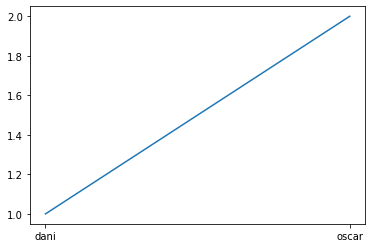

In [220]:
import matplotlib.pyplot as plt
plt.plot(a['adios'])

In [221]:
np.where([True, False, True])

(array([0, 2]),)

In [163]:
import pandas as pd

URL = "https://archive.ics.uci.edu/ml/machine-learning-databases/00409/Daily_Demand_Forecasting_Orders.csv"
frm = pd.read_csv(URL, sep=";", thousands='.')
frm.columns = ['week', 'day', 'urgent', 'nonurgent', 'A', 'B', 'C', 'fiscal', 'traffic', 'bank1', 'bank2', 'bank3', 'total' ]
frm.head()

,week,day,urgent,nonurgent,A,B,C,fiscal,traffic,bank1,bank2,bank3,total
0,1,4,316307,223270,61543,175586,302448,0,65556,44914,188411,14793,539577
1,1,5,128633,96042,38058,56037,130580,0,40419,21399,89461,7679,224675
2,1,6,43651,84375,21826,25125,82461,1386,11992,3452,21305,14947,129412
3,2,2,171297,127667,41542,113294,162284,18156,49971,33703,69054,18423,317120
4,2,3,90532,113526,37679,56618,116220,6459,48534,19646,16411,20257,210517


In [168]:
frm.groupby('day').sum()[['total']]

,total
day,
2,4292364
3,3647181
4,3665064
5,3287619
6,3160171


In [171]:
array_inusual = np.zeros_like(frm['A'], dtype=bool)
array_limit = np.zeros_like(frm['A'])

T = array_inusual.shape[0]
array_inusual.shape

(60,)

In [172]:
def inusual(past, current, k=2.0):
    
    mu = np.mean(past)
    sig = np.std(past)
    
    # Sólo nos interesan los inusuales por exceso
    limit = k*sig + mu
    if current > limit:
        is_inusual = True
    else:
        is_inusual = False
        
    return is_inusual, limit

In [173]:
array_inusual = np.zeros_like(frm['A'], dtype=bool)
array_limit = np.zeros_like(frm['A'])

T = array_inusual.shape[0]
for i in range(20, T):
    
    array_inusual[i], array_limit[i] = inusual(frm['A'].values[:i], frm['A'].values[i])

In [175]:
frm['A'].shape

(60,)

In [176]:
array_inusual.shape

(60,)

In [237]:
array_inusual = np.zeros_like(frm['A'], dtype=bool)
array_inusual
array_inusual.shape

(60,)

In [179]:
array_limit = np.zeros_like(frm['A'])
array_limit

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [241]:
array_inusual = np.zeros_like(frm['A'], dtype=bool)
array_limit = np.zeros_like(frm['A'])

T = array_inusual.shape[0]
for i in range(20, T):
    
    array_inusual[i], array_limit[i] = inusual(frm['A'].values[:i], frm['A'].values[i])

In [250]:
array_inusual

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True])

In [182]:
array_limit

array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0, 74221, 73425, 72859, 72281, 72794, 72146, 71532,
       71609, 71026, 71417, 70921, 70506, 70112, 71588, 73213, 74736,
       75354, 85198, 84764, 84251, 90142, 91124, 90559, 90142, 89626,
       89137, 88945, 88456, 87990, 87532, 87331, 86890, 86528, 86196,
       85892, 85514, 85432, 85203, 85097, 85903])

In [254]:
idx = np.where(array_inusual)
idx

AttributeError: 'tuple' object has no attribute 'dtype'

In [256]:
a = np.array([[1, 2, 3, 4, 5, 6],
              [-2, 1, 2, 3, 4, 5]])
print(np.where(a > 2))

(array([0, 0, 0, 0, 1, 1, 1]), array([2, 3, 4, 5, 3, 4, 5]))


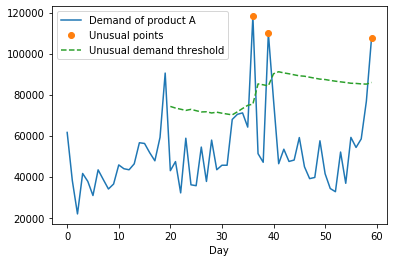

In [261]:
plt.plot(frm['A'])
idx = np.where(array_inusual)[0]
plt.plot(idx, frm['A'].values[array_inusual], 'o')
plt.plot(range(20, T), array_limit[20:], '--')
plt.xlabel('Day')
plt.legend(['Demand of product A', 'Unusual points', 'Unusual demand threshold'])

In [265]:
#JUEVES

In [267]:
import pandas as pd
import numpy as np

frm = pd.read_csv("/mnt/c/Users/PC/Desktop/KSCHOOL_MASTER_DS/Downloadss/auto-mpg.csv")
#frm.columns = ['date', 'FCB', 'RMA']
frm.head()

,mpg,cyl,displ,hp,weight,accel,yr,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [302]:
x = frm['displ'].values[:,None]
y = frm['mpg'].values[:,None]

m = -0.075
b = 50
xi = np.arange(x.min(), x.max(), 10)
yi = b + m*xi 

In [308]:
x

array([[307. ],
       [350. ],
       [318. ],
       [304. ],
       [302. ],
       [429. ],
       [454. ],
       [440. ],
       [455. ],
       [390. ],
       [383. ],
       [340. ],
       [400. ],
       [455. ],
       [113. ],
       [198. ],
       [199. ],
       [200. ],
       [ 97. ],
       [ 97. ],
       [110. ],
       [107. ],
       [104. ],
       [121. ],
       [199. ],
       [360. ],
       [307. ],
       [318. ],
       [304. ],
       [ 97. ],
       [140. ],
       [113. ],
       [232. ],
       [225. ],
       [250. ],
       [250. ],
       [232. ],
       [350. ],
       [400. ],
       [351. ],
       [318. ],
       [383. ],
       [400. ],
       [400. ],
       [258. ],
       [140. ],
       [250. ],
       [250. ],
       [122. ],
       [116. ],
       [ 79. ],
       [ 88. ],
       [ 71. ],
       [ 72. ],
       [ 97. ],
       [ 91. ],
       [113. ],
       [ 97.5],
       [ 97. ],
       [140. ],
       [122. ],
       [350. ],
       [

In [303]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x,y)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [306]:
[model.coef_, model.intercept_]

[array([[-0.06005143]]), array([35.12063594])]

In [309]:
model.predict(x)

array([[16.6848476 ],
       [14.1026362 ],
       [16.02428189],
       [16.86500188],
       [16.98510474],
       [ 9.35857341],
       [ 7.85728771],
       [ 8.6980077 ],
       [ 7.79723628],
       [11.70057909],
       [12.12093909],
       [14.70315048],
       [11.10006481],
       [ 7.79723628],
       [28.3348246 ],
       [23.23045323],
       [23.1704018 ],
       [23.11035038],
       [29.29564744],
       [29.29564744],
       [28.51497888],
       [28.69513316],
       [28.87528745],
       [27.85441317],
       [23.1704018 ],
       [13.50212193],
       [16.6848476 ],
       [16.02428189],
       [16.86500188],
       [29.29564744],
       [26.71343604],
       [28.3348246 ],
       [21.18870469],
       [21.60906468],
       [20.10777899],
       [20.10777899],
       [21.18870469],
       [14.1026362 ],
       [11.10006481],
       [14.04258478],
       [16.02428189],
       [12.12093909],
       [11.10006481],
       [11.10006481],
       [19.62736756],
       [26

In [316]:
aa = model.predict(np.array([8, 3, 2]).reshape(-1,1))
aa

array([[34.64022452],
       [34.94048165],
       [35.00053308]])

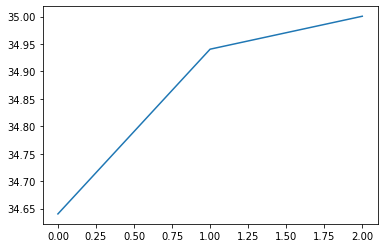

In [315]:
plt.plot(aa)

In [317]:
frm[['displ', 'weight']].values

array([[ 307. , 3504. ],
       [ 350. , 3693. ],
       [ 318. , 3436. ],
       [ 304. , 3433. ],
       [ 302. , 3449. ],
       [ 429. , 4341. ],
       [ 454. , 4354. ],
       [ 440. , 4312. ],
       [ 455. , 4425. ],
       [ 390. , 3850. ],
       [ 383. , 3563. ],
       [ 340. , 3609. ],
       [ 400. , 3761. ],
       [ 455. , 3086. ],
       [ 113. , 2372. ],
       [ 198. , 2833. ],
       [ 199. , 2774. ],
       [ 200. , 2587. ],
       [  97. , 2130. ],
       [  97. , 1835. ],
       [ 110. , 2672. ],
       [ 107. , 2430. ],
       [ 104. , 2375. ],
       [ 121. , 2234. ],
       [ 199. , 2648. ],
       [ 360. , 4615. ],
       [ 307. , 4376. ],
       [ 318. , 4382. ],
       [ 304. , 4732. ],
       [  97. , 2130. ],
       [ 140. , 2264. ],
       [ 113. , 2228. ],
       [ 232. , 2634. ],
       [ 225. , 3439. ],
       [ 250. , 3329. ],
       [ 250. , 3302. ],
       [ 232. , 3288. ],
       [ 350. , 4209. ],
       [ 400. , 4464. ],
       [ 351. , 4154. ],


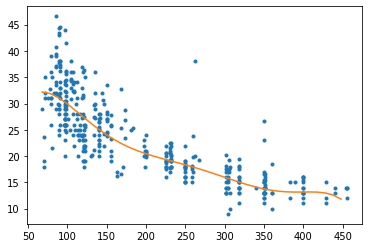

In [321]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np
model = Pipeline([('poly', PolynomialFeatures(degree=6)),
                  ('linear', LinearRegression(fit_intercept=False))])
# fit to an order-3 polynomial data
model = model.fit(x, y)
c = model.named_steps['linear'].coef_[0][::-1]

xi = np.arange(x.min(), x.max(), 10)
yi = np.array([np.polyval(c, s) for s in xi])
plt.plot(x, y, '.')
plt.plot(xi, yi)

In [328]:
c = model.named_steps['linear'].coef_
c

array([[ 3.95350749e-02,  1.26657832e+00, -1.77447713e-02,
         1.11065628e-04, -3.57792885e-07,  5.75770201e-10,
        -3.65950767e-13]])

In [329]:
c = model.named_steps['linear'].coef_[::-1]
c

array([[ 3.95350749e-02,  1.26657832e+00, -1.77447713e-02,
         1.11065628e-04, -3.57792885e-07,  5.75770201e-10,
        -3.65950767e-13]])